In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('다운로드/jj.csv')

In [7]:
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [8]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [9]:
train = df[:-4]
test = df[-4:]

In [10]:
import numpy as np

In [11]:
historial_mean = np.mean(train['data'])
historial_mean

4.308499987499999

In [12]:
test.loc[:, 'pred_mean'] = historial_mean

/tmp/ipykernel_8694/2216041475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = historial_mean


In [13]:
test

,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [14]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [15]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
mape_hist_mean

70.00752579965119

In [17]:
import matplotlib.pyplot as plt

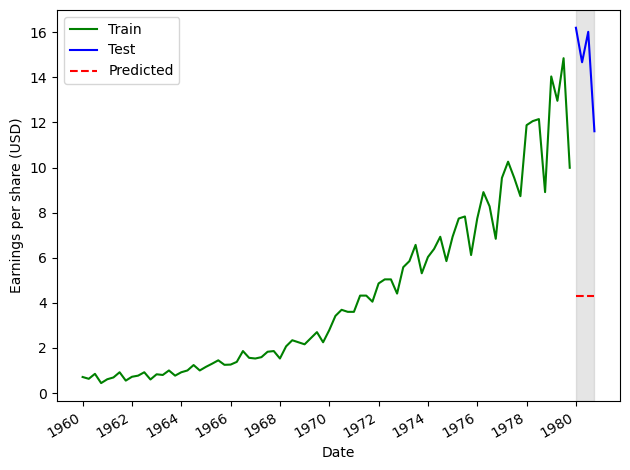

In [21]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-', label = 'Train')
ax.plot(test['date'], test['data'], 'b-', label = 'Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label = 'Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color = '#808080', alpha = 0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [22]:
last_year_mean = np.mean(train.data[-4:])
last_year_mean

12.96

In [23]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

/tmp/ipykernel_8694/1649473344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred__last_yr_mean'] = last_year_mean


In [24]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
mape_last_year_mean

15.5963680725103

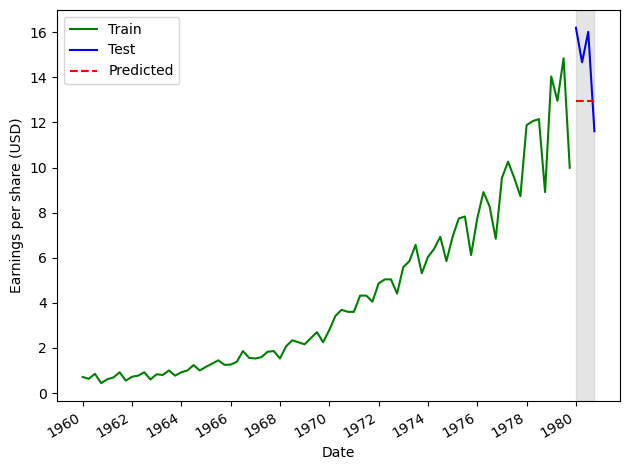

In [25]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-', label = 'Train')
ax.plot(test['date'], test['data'], 'b-', label = 'Test')
ax.plot(test['date'], test['pred__last_yr_mean'], 'r--', label = 'Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color = '#808080', alpha = 0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [26]:
last = train.data.iloc[-1]
last

9.99

In [27]:
test.loc[:, 'pred_last'] = last

/tmp/ipykernel_8694/155972364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last


In [29]:
mape_last = mape(test['data'], test['pred_last'])
mape_last

30.457277908606535

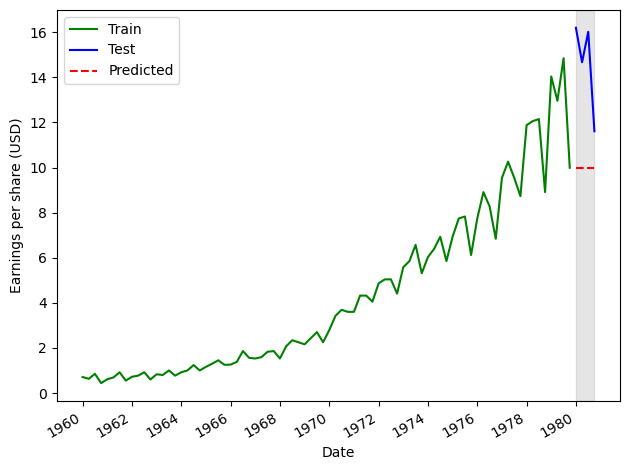

In [30]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-', label = 'Train')
ax.plot(test['date'], test['data'], 'b-', label = 'Test')
ax.plot(test['date'], test['pred_last'], 'r--', label = 'Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color = '#808080', alpha = 0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [31]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values

/tmp/ipykernel_8694/422051038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_season'] = train['data'][-4:].values


In [33]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
mape_naive_seasonal

11.561658552433654

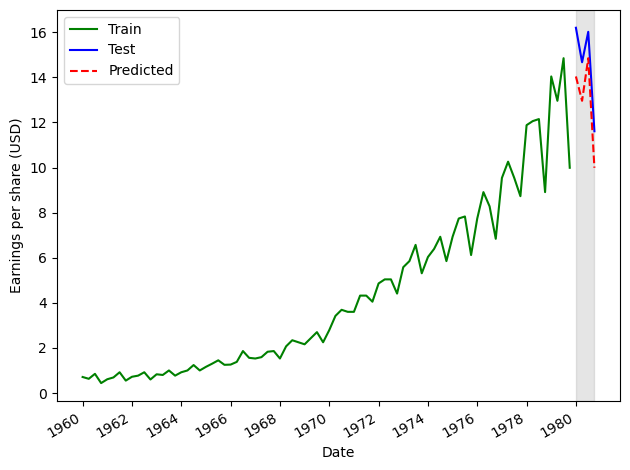

In [34]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-', label = 'Train')
ax.plot(test['date'], test['data'], 'b-', label = 'Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label = 'Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color = '#808080', alpha = 0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()